In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Numpy

In [ ]:
peajes = np.loadtxt('/content/peajes.csv')
peajes

array([[  0.,  28.,  48., ...,  15.,  19.,  24.],
       [  1.,  53.,  14., ...,  17.,  19.,  33.],
       [  4.,  21.,  72., ...,  49.,  25.,  34.],
       ...,
       [ 17.,  82.,  55., ..., 157., 105.,  90.],
       [  0.,  72.,  42., ...,  58.,  45., 126.],
       [ 15.,  55.,  70., ...,  31.,  47.,  58.]])

In [ ]:
peajes.shape

(43800, 20)

In [ ]:
n_horas = peajes.shape[0]
n_dias = n_horas/24
n_anyos = n_dias/365
n_casetas = peajes.shape[1]/2
print(f"Tenemos un total de {n_horas} horas registradas ({n_dias} dias, {n_anyos} años) para {n_casetas} casetas.")

Tenemos un total de 43800 horas registradas (1825.0 dias, 5.0 años) para 10.0 casetas.


In [ ]:
# Calculo del total de entradas y salidas
n_entradas = peajes[:,::2].sum()
n_salidas = peajes[:,1::2].sum()
print(f'Se han registrado un total de {n_entradas} entradas y {n_salidas} salidas.')

Se han registrado un total de 76749849.0 entradas y 76749626.0 salidas.


In [ ]:
peajes[:,::2][0]

array([  0.,  48.,   7., 125.,   0.,   7.,   1.,   2.,  76.,  19.])

In [ ]:
48+7+125+7+1+2+76+19

285

In [ ]:
# Total de entradas para cada caseta
peajes[:,::2].sum(axis=0)

array([ 6345740.,  7238805.,  6744366., 10854520., 10007459.,  2636930.,
       10352036.,  6896294.,  5450634., 10223065.])

Calificaciones

In [ ]:
notas = np.random.uniform(0, 10, size=15)
notas

array([2.9800779 , 7.27782888, 0.28435265, 2.87107699, 8.5265837 ,
       6.28815607, 5.19050234, 9.12926846, 3.65769617, 4.82633695,
       0.9810959 , 0.47374635, 5.23661868, 4.3868468 , 8.69481473])

In [ ]:
notas = np.round(notas, 3)
notas

array([2.98 , 7.278, 0.284, 2.871, 8.527, 6.288, 5.191, 9.129, 3.658,
       4.826, 0.981, 0.474, 5.237, 4.387, 8.695])

In [ ]:
notas.mean()

np.float64(4.7204)

In [ ]:
# Conocer el total de alumnos cuyo rendimiento es menor a la nota media
np.count_nonzero(notas < notas.mean())

7

In [ ]:
np.sum(notas < notas.mean())

np.int64(7)

In [ ]:
vector = notas < notas.mean()

# Crear una variable para "contar" a las personas con el valor True
contador = 0

# Comenzar un bucle sobre vector
for individuo in vector:
  # Condicional que comprueba si la observación toma el valor True
  if individuo == True:
    # Sumamos 1 a la variable creada
    contador += 1

print(contador)

7


In [ ]:
# Mostrar el top 5 de las mejores notas
np.sort(notas)[::-1][:5]

array([9.129, 8.695, 8.527, 7.278, 6.288])

# Pandas

In [ ]:
# Diccionrio que almacena nombres y edades
data = {
    "Nombre":['Ana','Juan','Luis'],
    "Edades":[40,50, 60]
}

df = pd.DataFrame(data)
df

,Nombre,Edades
0,Ana,40
1,Juan,50
2,Luis,60


In [ ]:
# Lista de listas
data = [['Ana',40], ['Juan',50],['Luis',60]]

df = pd.DataFrame(data=data, columns=['Nombre','Edad'])
df

,Nombre,Edad
0,Ana,40
1,Juan,50
2,Luis,60


In [ ]:
# Crear la lista de nombres
ls_nombres = ['Juan','Ricardo','Sofía','Manuel','Alexander']
# Crear la lista de apellidos
ls_apellidos = ['López Ramirez', 'López Ahumada','Gutiérrez Sánchez','Ramírez Ramírez','López Enríquez']
# Crear el array de nota usando rand()
ls_notas = list(np.round(np.random.uniform(0,10,5),2))
# Crear lista de DNIs
ls_dni = ['12345A','12346B','12347C','12348D','12349C']

In [ ]:
df_notas = pd.DataFrame(dict(DNI = ls_dni, Nombre = ls_nombres, Apellidos = ls_apellidos, Calificacion = ls_notas))
df_notas

,DNI,Nombre,Apellidos,Calificacion
0,12345A,Juan,López Ramirez,6.23
1,12346B,Ricardo,López Ahumada,1.13
2,12347C,Sofía,Gutiérrez Sánchez,1.42
3,12348D,Manuel,Ramírez Ramírez,1.37
4,12349C,Alexander,López Enríquez,6.42


In [ ]:
df_notas.shape

(5, 4)

In [ ]:
df_notas.dtypes

,0
DNI,object
Nombre,object
Apellidos,object
Calificacion,float64


In [ ]:
df_notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DNI           5 non-null      object 
 1   Nombre        5 non-null      object 
 2   Apellidos     5 non-null      object 
 3   Calificacion  5 non-null      float64
dtypes: float64(1), object(3)
memory usage: 292.0+ bytes


In [ ]:
df.isna().sum()

,0
Nombre,0
Edad,0


In [ ]:
# Mostrar laas primeras 3 filas de la tabla
df_notas.head(3)

,DNI,Nombre,Apellidos,Calificacion
0,12345A,Juan,López Ramirez,2.20
1,12346B,Ricardo,López Ahumada,3.91
2,12347C,Sofía,Gutiérrez Sánchez,0.98


In [ ]:
df_notas.iloc[:3,]

,DNI,Nombre,Apellidos,Calificacion
0,12345A,Juan,López Ramirez,3.85
1,12346B,Ricardo,López Ahumada,5.81
2,12347C,Sofía,Gutiérrez Sánchez,7.35


In [ ]:
df_notas.tail(2)

,DNI,Nombre,Apellidos,Calificacion
3,12348D,Manuel,Ramírez Ramírez,2.68
4,12349C,Alexander,López Enríquez,3.39


In [ ]:
# Mostrar los datos de los alumnos cuya calificación está por encima de los 5 puntos
df_notas[df_notas['Calificacion']>5]

,DNI,Nombre,Apellidos,Calificacion
0,12345A,Juan,López Ramirez,6.23
4,12349C,Alexander,López Enríquez,6.42


In [ ]:
# Mostrar el DNI de los alumnos cuya calificación es inferior a la calificación promedio
df_notas[df_notas['Calificacion']<df_notas['Calificacion'].mean()]['DNI']

,DNI
0,12345A
4,12349C


In [ ]:
df_notas[df_notas['Calificacion']<df_notas['Calificacion'].mean()][['Nombre','Apellidos']]

,Nombre,Apellidos
0,Juan,López Ramirez
4,Alexander,López Enríquez


In [ ]:
# Crea una nueva columna que indique si el alumno a aprobado
df_notas['Aprobado'] = df_notas['Calificacion'] >= 5
df_notas

,DNI,Nombre,Apellidos,Calificacion,Aprobado
0,12345A,Juan,López Ramirez,6.23,True
1,12346B,Ricardo,López Ahumada,1.13,False
2,12347C,Sofía,Gutiérrez Sánchez,1.42,False
3,12348D,Manuel,Ramírez Ramírez,1.37,False
4,12349C,Alexander,López Enríquez,6.42,True


In [ ]:
df_notas['Grupo'] = df_notas['DNI'].apply(lambda x: 'A' if int(x[-2])%2==0 else 'B')
df_notas

,DNI,Nombre,Apellidos,Calificacion,Aprobado,Grupo
0,12345A,Juan,López Ramirez,6.23,True,B
1,12346B,Ricardo,López Ahumada,1.13,False,A
2,12347C,Sofía,Gutiérrez Sánchez,1.42,False,B
3,12348D,Manuel,Ramírez Ramírez,1.37,False,A
4,12349C,Alexander,López Enríquez,6.42,True,B


In [ ]:
df_titanic = sns.load_dataset('titanic')
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df_titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_titanic.groupby(by='class')['fare'].mean()

/tmp/ipython-input-428791813.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_titanic.groupby(by='class')['fare'].mean()


,fare
class,
First,84.154687
Second,20.662183
Third,13.675550


In [ ]:
df_calculo = df_titanic.groupby(by=['class','who'])[['fare','survived']].mean().sort_values(by='survived', ascending=False)

/tmp/ipython-input-3645321460.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_calculo = df_titanic.groupby(by=['class','who'])[['fare','survived']].mean().sort_values(by='survived', ascending=False)


In [ ]:
df_calculo

fare  survived
class  who                        
Second child   28.323905  1.000000
First  woman  104.317995  0.978022
Second woman   20.868624  0.909091
First  child  139.382633  0.833333
Third  woman   15.354351  0.491228
       child   23.220190  0.431034
First  man     65.951086  0.352941
Third  man     11.340213  0.119122
Second man     19.054124  0.080808

In [ ]:
df_calculo.rename(columns={'fare':'Media_tarifa','survived':'tasa_supervivencia'}, inplace=True)

In [ ]:
df_calculo

Media_tarifa  tasa_supervivencia
class  who                                    
Second child     28.323905            1.000000
First  woman    104.317995            0.978022
Second woman     20.868624            0.909091
First  child    139.382633            0.833333
Third  woman     15.354351            0.491228
       child     23.220190            0.431034
First  man       65.951086            0.352941
Third  man       11.340213            0.119122
Second man       19.054124            0.080808

In [ ]:
df_calculo.to_csv('tarifas_supervivencia.csv')

In [ ]:
df_calculo.to_parquet('tarifas_supervivencia.parquet')

# Visualización

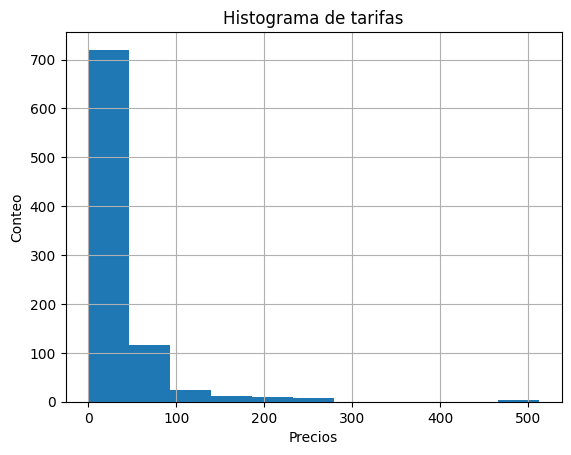

In [ ]:
df_titanic['fare'].hist(bins='sturges')
plt.title('Histograma de tarifas')
plt.xlabel('Precios')
plt.ylabel('Conteo')
plt.show()

<Axes: title={'center': 'fare'}, xlabel='class'>

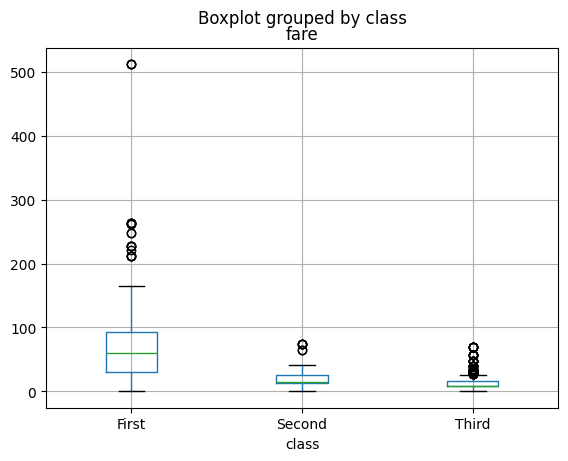

In [ ]:
df_titanic.boxplot(column='fare', by='class')

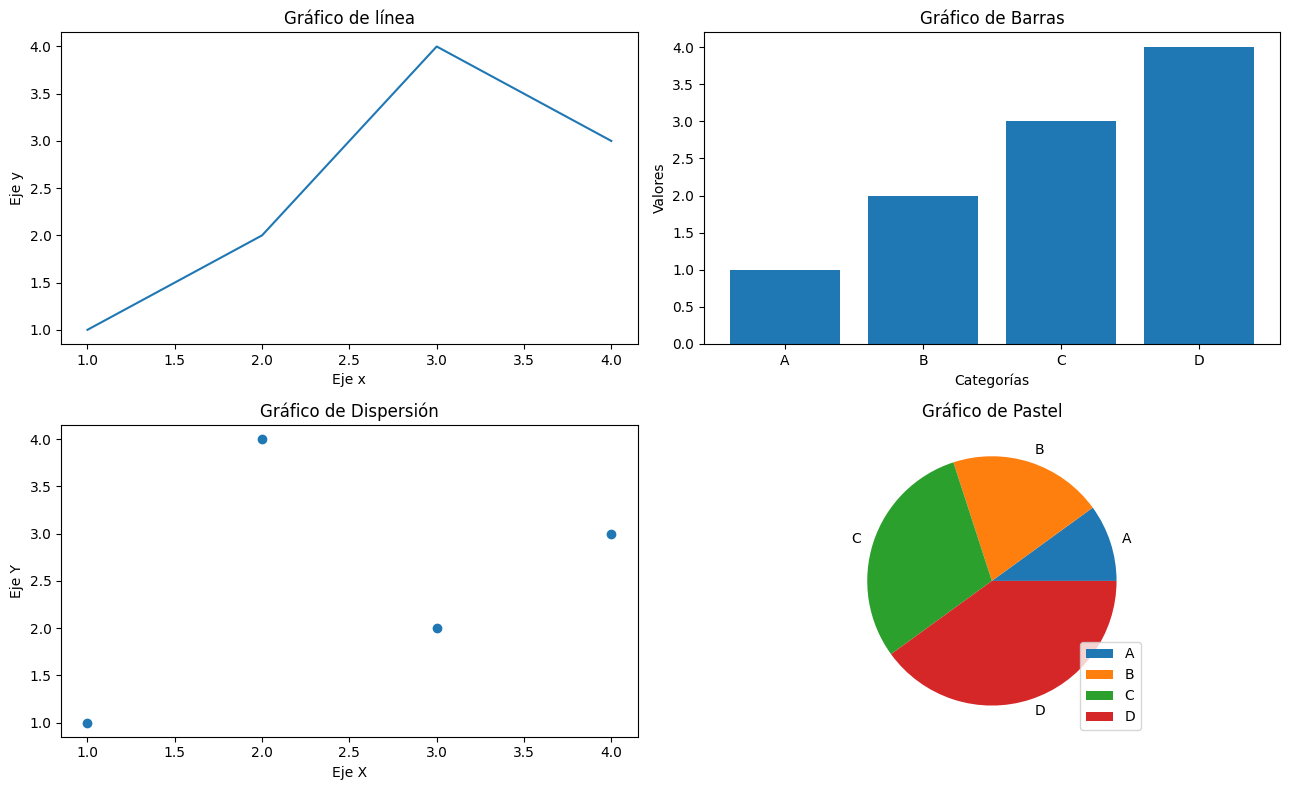

In [ ]:
#https://www.w3schools.com/python/matplotlib_subplot.asp
fig, ax = plt.subplots(2, 2, figsize=(13, 8))

# Primer gráfico (Line plot)
ax[0,0].plot([1,2,3,4],[1,2,4,3])
ax[0,0].set_title('Gráfico de línea')
ax[0,0].set_xlabel('Eje x')
ax[0,0].set_ylabel('Eje y')

ax[0, 1].bar(['A', 'B', 'C', 'D'],[1, 2, 3, 4])
ax[0, 1].set_title('Gráfico de Barras')
ax[0, 1].set_xlabel('Categorías')
ax[0, 1].set_ylabel('Valores')

ax[1, 0].scatter([1, 2, 3, 4], [1, 4, 2, 3])
ax[1, 0].set_title('Gráfico de Dispersión')
ax[1, 0].set_xlabel('Eje X')
ax[1, 0].set_ylabel('Eje Y')

ax[1, 1].pie([10, 20, 30, 40], labels=['A', 'B', 'C', 'D'])
ax[1, 1].set_title('Gráfico de Pastel')
ax[1, 1].legend()

plt.tight_layout()
plt.show()

In [ ]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=3, random_state=42)
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(3)])
df['grupo'] = y

In [ ]:
df

,feature_0,feature_1,feature_2,grupo
0,-1.623134,8.877208,4.840013,0
1,1.712671,-5.152793,-6.783676,1
2,-1.944497,8.379681,5.635631,0
3,-8.991812,8.710780,3.168924,2
4,-4.301243,8.567513,5.844802,0
...,...,...,...,...
995,-7.503425,7.953273,3.093712,2
996,-0.266880,-7.377990,-5.887421,1
997,2.365254,-7.068524,-6.327036,1
998,-9.941511,7.010980,0.367572,2


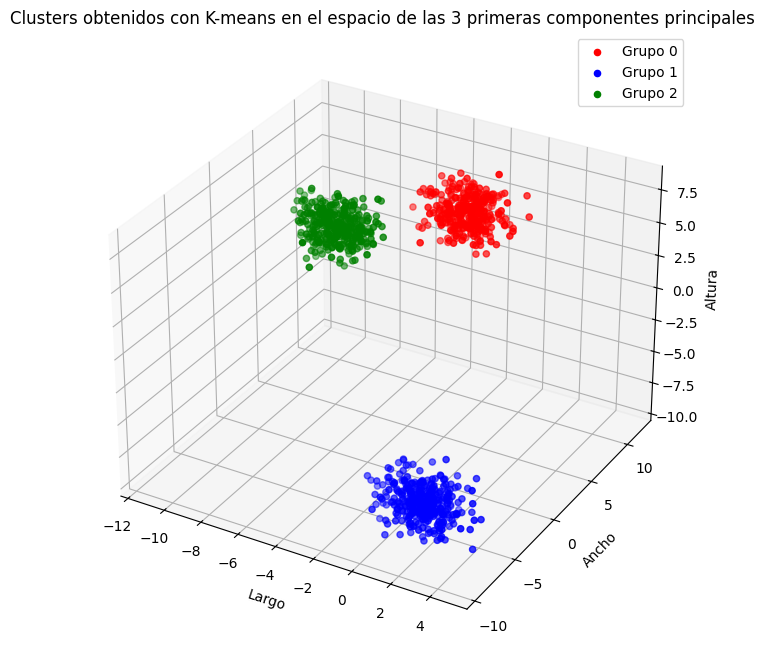

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Definir una lista de 3 colores
equipos = ['red','blue','green']

# Realizar un bucle de 3 iteraciones
for i in range(3):
  # Acceder al color correspondiente
  color = equipos[i]
  # Filtrar el df por el grupo
  df_equipo = df[df['grupo']==i]
  # Hacer el scatter añadiendo el color
  ax.scatter(df_equipo['feature_0'],df_equipo['feature_1'],df_equipo['feature_2'],c=color, label=f'Grupo {i}')

ax.set_zlabel('Altura')
ax.set_xlabel('Largo')
ax.set_ylabel('Ancho')

# Título y leyenda
ax.set_title('Clusters obtenidos con K-means en el espacio de las 3 primeras componentes principales')
ax.legend()

# Mostrar el gráfico
plt.show()